In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [36]:
# To import libraries
comp_deaths_hospitals = pd.read_csv("No-missing-score dataframes are in here/Complications and Deaths - Hospital.csv", low_memory=False)
readdmissions = pd.read_csv("No-missing-score dataframes are in here/Readmissions and Deaths - VA_07_10_2018.csv", low_memory=False)
medicare = pd.read_csv("No-missing-score dataframes are in here/Medicare Hospital Spending per Patient - Hospital.csv", low_memory=False)
u_visits = pd.read_csv("No-missing-score dataframes are in here/Unplanned Hospital Visits - Hospital.csv", low_memory=False)

# Data Cleaning

## To narrow each dataframe down to state level, KS and MO

In [37]:
comp_deaths_hospitals_ks_mo = comp_deaths_hospitals[(comp_deaths_hospitals['State']=='KS')|(comp_deaths_hospitals['State']=='MO')]
readdmissions_ks_mo = readdmissions[(readdmissions['State']=='KS')|(readdmissions['State']=='MO')]
medicare_ks_mo = medicare[(medicare['State']=='KS')|(medicare['State']=='MO')]
u_visits_ks_mo = u_visits[(u_visits['State']=='KS')|(u_visits['State']=='MO')]

## To narrow each dataframe down to county level, JACKSON, JOHNSON, CLAY, LEAVENWORTH, WYANDOTTE, SEDGWICK

In [38]:
comp_deaths_hospitals_county = comp_deaths_hospitals_ks_mo[(comp_deaths_hospitals['County Name']=='JACKSON')|
                                               (comp_deaths_hospitals['County Name']=='JOHNSON')|
                                               (comp_deaths_hospitals['County Name']=='CLAY')|
                                               (comp_deaths_hospitals['County Name']=='LEAVENWORTH')|
                                               (comp_deaths_hospitals['County Name']=='SEDGWICK')|
                                               (comp_deaths_hospitals['County Name']=='WYANDOTTE')]

readdmissions_county = readdmissions_ks_mo[(readdmissions['County']=='JACKSON')|
                                    (readdmissions['County']=='JOHNSON')|
                                    (readdmissions['County']=='CLAY')|
                                    (readdmissions['County']=='LEAVENWORTH')|
                                    (readdmissions['County']=='SEDGWICK')|
                                    (readdmissions['County']=='WYANDOTTE')]
                                      
medicare_county = medicare_ks_mo[(medicare['County Name']=='JACKSON')|
                          (medicare['County Name']=='JOHNSON')|
                          (medicare['County Name']=='CLAY')|
                          (medicare['County Name']=='LEAVENWORTH')|
                          (medicare['County Name']=='SEDGWICK')|
                          (medicare['County Name']=='WYANDOTTE')]

u_visits_county = u_visits_ks_mo[(u_visits['County Name']=='JACKSON')|
                          (u_visits['County Name']=='JOHNSON')|
                          (u_visits['County Name']=='CLAY')|
                          (u_visits['County Name']=='LEAVENWORTH')|
                          (u_visits['County Name']=='SEDGWICK')|
                          (u_visits['County Name']=='WYANDOTTE')]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## To select all columns that seems useful

In [39]:
# Renameing "County" columns to "County Name"
readdmissions_county = readdmissions_county.rename(columns={'County':'County Name'})

In [40]:
comp_deaths_hospitals_county = comp_deaths_hospitals_county[['Provider ID','Hospital Name', 'City',
                                                             'State','County Name', 
                                                             'Measure Name', 'Measure ID',
                                                             'Compared to National', 'Score']]

readdmissions_county = readdmissions_county[['Provider_ID', 'Hospital Name',  'City', 'State',
                                             'County Name', 'Measure Name', 'Measure ID', 'Score']]

medicare_county = medicare_county[['Provider ID', 'Hospital Name', 'City', 'State',
                                   'County Name', 'Measure Name', 'Measure ID', 'Score']]

u_visits_county = u_visits_county[['Provider ID', 'Hospital Name', 'City', 'State', 
                                   'County Name', 'Measure Name', 'Measure ID','Compared to National', 
                                   'Score']]

## To take care of missing scores

### To calculate average scores based on county for missing score values

In [41]:
# Converting object(data type) to numeric
# df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
comp_deaths_hospitals_county['Score'] = comp_deaths_hospitals_county['Score'].apply(pd.to_numeric, errors = 'coerce')
readdmissions_county['Score'] = readdmissions_county['Score'].apply(pd.to_numeric, errors = 'coerce')
medicare_county['Score'] = medicare_county['Score'].apply(pd.to_numeric, errors = 'coerce')
u_visits_county['Score'] = u_visits_county['Score'].apply(pd.to_numeric, errors = 'coerce')

In [42]:
# Calculating mean and median Score by counties
comp_deaths_hospitals_score_mean = comp_deaths_hospitals_county.groupby(by='County Name')['Score'].mean()
comp_deaths_hospitals_score_median = comp_deaths_hospitals_county.groupby(by='County Name')['Score'].median()

readdmissions_group_mean = readdmissions_county.groupby(by='County Name')['Score'].mean()
readdmissions_group_median = readdmissions_county.groupby(by='County Name')['Score'].median()

medicare_score_mean = medicare_county.groupby(by='County Name')['Score'].mean()
medicare_score_median = medicare_county.groupby(by='County Name')['Score'].median()

u_visits_score_mean = u_visits_county.groupby(by='County Name')['Score'].mean()
u_visits_score_median = u_visits_county.groupby(by='County Name')['Score'].median()

In [43]:
comp_deaths_score_summary = pd.DataFrame([comp_deaths_hospitals_score_mean,
                                          comp_deaths_hospitals_score_median], index=['Mean', 'Median'])
comp_deaths_score_summary = comp_deaths_score_summary.transpose()

readdmissions_score_summary = pd.DataFrame([readdmissions_group_mean,
                                            readdmissions_group_median], index=['Mean', 'Median'])
readdmissions_score_summary = readdmissions_score_summary.transpose()

medicare_score_summary = pd.DataFrame([medicare_score_mean,
                                       medicare_score_median], index=['Mean', 'Median'])
medicare_score_summary = medicare_score_summary.transpose()

u_visits_score_summary = pd.DataFrame([u_visits_score_mean,
                                       u_visits_score_median], index=['Mean', 'Median'])
u_visits_score_summary = u_visits_score_summary.transpose()


In [44]:
# Display Dataframe side by side for improving readbility

In [45]:
# # df["value"] = df.groupby("name").transform(lambda x: x.fillna(x.mean()))

# def comp_deaths_median_socre(cols):
#     Score = cols[0]
#     County_Name = cols[1]
    
#     if County_Name == 'JACKSON':
#          if Score == 'NaN':
#             return 2.980
#     elif County_Name == 'JOHNSON':
#         if Score == 'NaN':
#             return 2.560
#     elif County_Name == 'CLAY':
#         if Score == 'NaN':
#             return 3.430
#     elif County_Name == 'LEAVENWORTH':
#         if Score == 'NaN':
#             return 2.590
#     elif County_Name == 'SEDGWICK':
#         if Score == 'NaN':
#             return 2.280
#     elif County_Name == 'WYANDOTTE':
#         if Score == 'NaN':
#             return 2.985
#     else:
#         return 'Score'

# comp_deaths_hospitals_county['Score'] = (comp_deaths_hospitals_county[['Score', 'County Name']]
#                                         .apply(comp_deaths_median_socre, axis = 1))


## To create columns for average income and median income

### Average income and median income

In [46]:
avg_income = {'Jackson ':47419,
             'Johnson ':68334,
             'Clay ':60438,
             'Wyandotte ':34533,
             'Leavenworth ':65328,
             'Sedgwick':48670}

median_income = {'Jackson ':50652,
                'Johnson ':81121,
                'Clay ':65675,
                'Wyandotte ':42783,
                'Leavenworth ':70022,
                'Sedgwick':52841}

### To create columns with null value

In [47]:
comp_deaths_hospitals_county['Avg Income'] = np.nan
readdmissions_county['Avg Income'] = np.nan
medicare_county['Avg Income'] = np.nan
u_visits_county['Avg Income'] = np.nan

In [48]:
comp_deaths_hospitals_county['Median Income'] = np.nan
readdmissions_county['Median Income'] = np.nan
medicare_county['Median Income'] = np.nan
u_visits_county['Median Income'] = np.nan

### To create a function and replace null values with average income according to County

In [49]:
# Function to replace null values
def impute_avg_income(cols):
    Avg_Income = cols[0]
    County_Name = cols[1]
    
    if County_Name == 'JACKSON':
        return 47419
    elif County_Name == 'JOHNSON':
        return 68334
    elif County_Name == 'CLAY':
        return 60438
    elif County_Name == 'LEAVENWORTH':
        return 65328
    elif County_Name == 'SEDGWICK':
        return 486470
    else:
        return 34533
    
def impute_median_income(cols):
    Median_Income = cols[0]
    County_Name = cols[1]
    
    if County_Name == 'JACKSON':
        return 50652
    elif County_Name == 'JOHNSON':
        return 81121
    elif County_Name == 'CLAY':
        return 65675
    elif County_Name == 'LEAVENWORTH':
        return 70022
    elif County_Name == 'SEDGWICK':
        return 52841
    else:
        return 42783

### To apply the function to "Avg Income" and "Median Income" columns

In [50]:
comp_deaths_hospitals_county['Avg Income'] = (comp_deaths_hospitals_county[['Avg Income', 'County Name']]
                                              .apply(impute_avg_income, axis=1))

readdmissions_county['Avg Income'] = (readdmissions_county[['Avg Income', 'County Name']]
                                      .apply(impute_avg_income, axis=1))

medicare_county['Avg Income'] = (medicare_county[['Avg Income', 'County Name']]
                                 .apply(impute_avg_income, axis=1))

u_visits_county['Avg Income'] = (u_visits_county[['Avg Income', 'County Name']]
                                 .apply(impute_avg_income, axis=1))

In [51]:
comp_deaths_hospitals_county['Median Income'] = (comp_deaths_hospitals_county[['Median Income', 'County Name']]
                                                 .apply(impute_median_income, axis=1))

readdmissions_county['Median Income'] = (readdmissions_county[['Median Income', 'County Name']]
                                         .apply(impute_median_income, axis=1))

medicare_county['Median Income'] = (medicare_county[['Median Income', 'County Name']]
                                    .apply(impute_median_income, axis=1))

u_visits_county['Median Income'] = (u_visits_county[['Median Income', 'County Name']]
                                    .apply(impute_median_income, axis=1))

## Scaling Score

In [52]:
comp_deaths_hospitals_county.head(2)

,Provider ID,Hospital Name,City,State,County Name,Measure Name,Measure ID,Compared to National,Score,Avg Income,Median Income
29089,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,Not Available,2.59,65328,70022
29090,170009,SAINT JOHN HOSPITAL,LEAVENWORTH,KS,LEAVENWORTH,Death rate for heart attack patients,MORT_30_AMI,Number of Cases Too Small,2.59,65328,70022


Text(0.5, 0, 'Score')

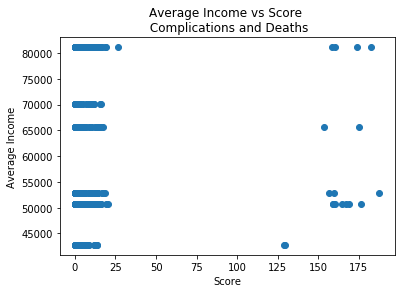

In [58]:
plt.scatter(x='Score', y='Median Income', data=comp_deaths_hospitals_county)
plt.title('Average Income vs Score \n Complications and Deaths')
plt.ylabel('Average Income')
plt.xlabel('Score')


In [ ]:
plt.scatter(x='Avg Income', y='Score', data=comp_deaths_hospitals_county)

In [53]:
readmit_min = readdmissions_county[["County_Name", "Measure Name", "Measure ID", "Compare to National", "Denominator", "Score", "Lower Estimate", "Higher Estimate"]]
medi_min = medicare_county[["County Name", "Measure Name", "Measure ID", "Score"]]
u_min = u_visits_county[["County Name", "Measure Name", "Measure ID", "Compared to National", "Denominator", "Score", "Lower Estimate", "Higher Estimate" ]]

u_min.head()

KeyError: "['County' 'Compare to National' 'Denominator' 'Lower Estimate'\n 'Higher Estimate'] not in index"

In [48]:
# readmit_min, u_min, medi_min
# readmit_min = readmit_min.rename(columns={"County":"County Name"})
# merge_alpha = pd.merge(readmit_min, medi_min, on=["County Name"], suffixes=(" Readmission", " Medicare"))
# merge_one = pd.merge(merge_alpha, u_min, on=["County Name"], suffixes=(" Readmission", " Unexpected Visit"))
# merge_one.head(10)

,County Name,Measure Name Readmission,Measure ID Readmission,Compare to National,Denominator Readmission,Score Readmission,Lower Estimate Readmission,Higher Estimate Readmission,Measure Name Medicare,Measure ID Medicare,Score Medicare,Measure Name,Measure ID,Compared to National,Denominator Unexpected Visit,Score,Lower Estimate Unexpected Visit,Higher Estimate Unexpected Visit
0,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Hospital return days for heart attack patients,EDAC_30_AMI,Average days per 100 discharges,181,-9.5,-24.7,8
1,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Hospital return days for heart failure patients,EDAC_30_HF,Average days per 100 discharges,414,-12.7,-30,4.3
2,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Hospital return days for pneumonia patients,EDAC_30_PN,Fewer days than average per 100 discharges,467,-15,-29,-2.6
3,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Rate of unplanned hospital visits after colono...,OP-32,No Different than the National Rate,96,15.8,11.1,22.3
4,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Acute Myocardial Infarction (AMI) 30-Day Readm...,READM_30_AMI,No Different than the National Rate,181,14.4,11.7,17.7
5,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Rate of readmission for CABG,READM_30_CABG,No Different than the National Rate,57,13.5,10,18.3
6,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Rate of readmission for chronic obstructive pu...,READM_30_COPD,No Different than the National Rate,257,20.1,17.1,23.6
7,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,No Different than the National Rate,414,19.5,16.7,22.6
8,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,Rate of readmission after hip/knee replacement,READM_30_HIP_KNEE,No Different than the National Rate,573,4.2,3.1,5.6
9,SHAWNEE,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT-30-AMI,Number of Cases Too Small,NaN,NaN,NaN,NaN,Medicare hospital spending per patient (Medica...,MSPB-1,0.98,30-Day Hospital-Wide All-Cause Unplanned Readm...,READM_30_HOSP_WIDE,No Different than the National Rate,2137,14.9,13.9,15.9


In [ ]:
kansas = [559836, 503438, 179060, 8523, ]